In [80]:
import pandas as pd
df=pd.read_excel("Academic_Data.xlsx") 
df

,semester,Theory,labs,gpa,total internals,Lab internals,midterm,tests,A+,A,B,C,D,E,insem1,insem2
0,1,6,3,7.36,228,137,86.5,141,0,1,3,4,1,0,NaN,NaN
1,2,6,3,7.95,184,152,113.0,71,2,3,0,3,1,0,57.0,56.0
2,3,6,3,7.96,201,139,110.0,91,0,1,5,3,0,0,54.0,56.0
3,4,5,3,7.57,142,134,76.0,66,1,0,3,2,2,1,50.5,40.0
4,5,5,3,8.95,203,168,119.0,84,1,6,1,0,0,0,59.5,59.5
5,6,5,3,8.85,219,162,91.0,128,0,7,1,0,0,0,93.5,93.5
6,7,5,0,8.60,213,0,91.0,122,1,2,1,1,0,0,91.5,91.5


First 3 semesters have 6 subjects that count to GPA and the from fourth semester onwards there are 5 subjects that count to GPA. This causes a different maximum marks for each of the tests. So we take percetage marks recieved to have a uniform representation.

In [81]:
def ConvertTotalInternals():
    percentList=[]
    for i in range(7):
        if i<3:
            percentList.append(round((df['total internals'][i]/300) *100,2)) 
        else:
            percentList.append(round((df['total internals'][i]/250) *100,2))
    return percentList

In [82]:
def convertMidterms():
    percentList=[]
    for i in range(7):
        if i==0:
            percentList.append(round((df['midterm'][i]/120) *100,2))
        elif i<3:
            percentList.append(round((df['midterm'][i]/180) *100,2)) 
        elif i<5:
            percentList.append(round((df['midterm'][i]/150)*100,2))
        else:
            percentList.append(round((df['midterm'][i]/120)*100,2))
    return percentList   

In [86]:
def convertTests():
    percentList=[]
    for i in range(7):
        if i==0:
            percentList.append(round((df['tests'][i]/180)*100,2))
        elif i<3:
            percentList.append(round((df['tests'][i]/120)*100,2)) 
        elif i<5:
            percentList.append(round((df['tests'][i]/100)*100,2))
        else:
            percentList.append(round((df['tests'][i]/130)*100,2))
    return percentList  

In [87]:
data=df[['semester','gpa']].copy()
data['total internals %']=ConvertTotalInternals()
data['lab internals']=df['Lab internals'].copy()
data['midterm %']=convertMidterms()
data['tests %']=convertTests()
data[['A+','A','B','C','D','E']]=df[['A+','A','B','C','D','E']].copy()

In [88]:
data

,semester,gpa,total internals %,lab internals,midterm %,tests %,A+,A,B,C,D,E
0,1,7.36,76.00,137,72.08,78.33,0,1,3,4,1,0
1,2,7.95,61.33,152,62.78,59.17,2,3,0,3,1,0
2,3,7.96,67.00,139,61.11,75.83,0,1,5,3,0,0
3,4,7.57,56.80,134,50.67,66.00,1,0,3,2,2,1
4,5,8.95,81.20,168,79.33,84.00,1,6,1,0,0,0
5,6,8.85,87.60,162,75.83,98.46,0,7,1,0,0,0
6,7,8.60,85.20,0,75.83,93.85,1,2,1,1,0,0


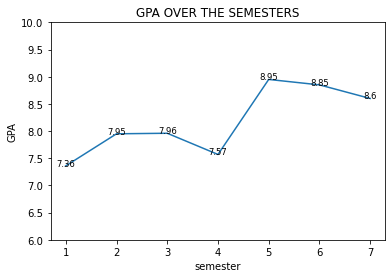

In [89]:
import matplotlib.pyplot as plt
x=data['semester']
y=data['gpa']
plt.plot(x,y)
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='baseline',fontsize=8.5)
plt.ylim(6,10)
plt.title("GPA OVER THE SEMESTERS")
plt.xlabel('semester')
plt.ylabel('GPA')
plt.show()

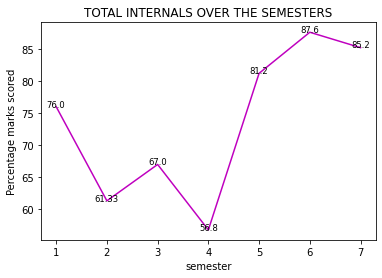

In [92]:
import matplotlib.pyplot as plt
x=data['semester']
y=data['total internals %']
plt.plot(x,y,c='m')
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='baseline',fontsize=8.5)
plt.title("TOTAL INTERNALS OVER THE SEMESTERS")
plt.xlabel('semester')
plt.ylabel('Percentage marks scored')
plt.show()

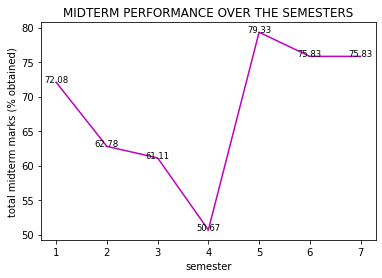

In [94]:
import matplotlib.pyplot as plt
x=data['semester']
y=data['midterm %']
plt.plot(x,y,c='m')
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='baseline',fontsize=8.5)
plt.title("MIDTERM PERFORMANCE OVER THE SEMESTERS")
plt.xlabel('semester')
plt.ylabel('total midterm marks (% obtained)')
plt.show()

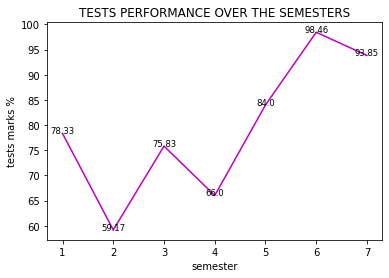

In [ ]:
import matplotlib.pyplot as plt
x=data['semester']
y=data['tests %']
plt.plot(x,y,c='m')
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='baseline',fontsize=8.5)
plt.title("TESTS PERFORMANCE OVER THE SEMESTERS")
plt.xlabel('semester')
plt.ylabel('tests marks %')
plt.show()

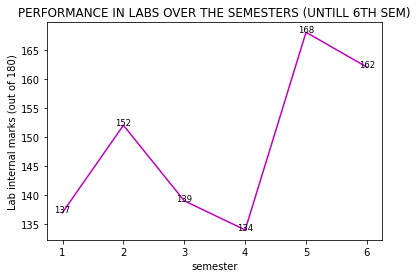

In [124]:
import matplotlib.pyplot as plt
x=data['semester'][:6]
y=data['lab internals'][:6]
plt.plot(x,y,c='m')
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='baseline',fontsize=8.5)
plt.title("PERFORMANCE IN LABS OVER THE SEMESTERS (UNTILL 6TH SEM)")
plt.xlabel('semester')
plt.ylabel('Lab internal marks (out of 180)')
plt.show()

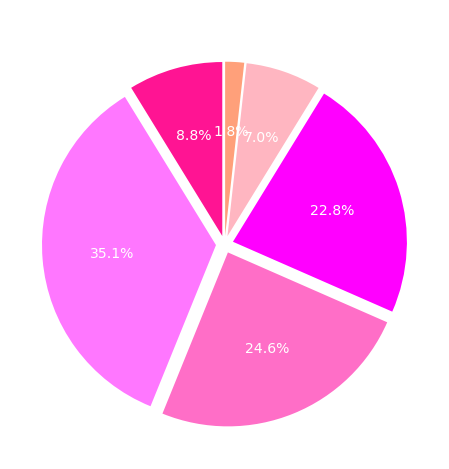

In [116]:
import matplotlib.pyplot as plt
colors =['#FF1493', '#FF77FF', '#FF6EC7', '#FF00FF',  '#FFB6C1', '#FFA07A']
grades = ['A+','A','B','C','D','E'] 
freq=[]
for i in range(6):
    sum=data[grades[i]].sum()    
    freq.append(sum)
plt.figure(figsize=(8, 8))
explode = [0.05] * len(freq)
plt.pie(freq, labels=grades, startangle=90, colors=colors, autopct='%1.1f%%', 
        textprops={'fontsize': 14, 'color': 'white'},explode=explode)
plt.title('GRADES RECIEVED OVER ALL THE SEMESTERS',fontsize=18,color='white')
plt.show()


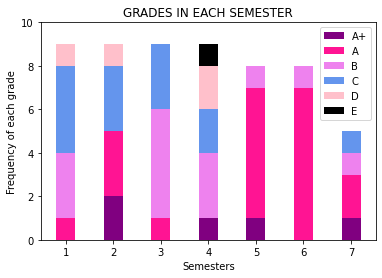

In [117]:
import matplotlib.pyplot as plt
import numpy as np


categories = [1, 2, 3, 4, 5, 6, 7] 
ap_freq = [0, 2, 0, 1, 1, 0, 1]
a_freq = [1, 3, 1, 0, 6, 7, 2]
b_freq = [3, 0, 5, 3, 1, 1, 1]
c_freq = [4, 3, 3, 2, 0, 0, 1]
d_freq = [1, 1, 0, 2, 0, 0, 0]
e_freq = [0, 0, 0, 1, 0, 0, 0]

wdth = 0.4
x = np.arange(len(categories))
colors = ['purple', 'deeppink', 'violet', 'cornflowerblue', 'pink', 'black']

# Stacked bar chart
plt.bar(x, ap_freq, label='A+', color=colors[0], width=wdth)
plt.bar(x, a_freq, bottom=ap_freq, label='A', color=colors[1], width=wdth)
plt.bar(x, b_freq, bottom=np.add(ap_freq, a_freq), label='B', color=colors[2], width=wdth)
plt.bar(x, c_freq, bottom=np.add(np.add(ap_freq, a_freq), b_freq), label='C', color=colors[3], width=wdth)
plt.bar(x, d_freq, bottom=np.add(np.add(np.add(ap_freq, a_freq), b_freq), c_freq), label='D', color=colors[4], width=wdth)
plt.bar(x, e_freq, bottom=np.add(np.add(np.add(np.add(ap_freq, a_freq), b_freq), c_freq), d_freq), label='E', color=colors[5], width=wdth)

# Labels and title
plt.xlabel('Semesters')
plt.ylabel('Frequency of each grade')
plt.title('GRADES IN EACH SEMESTER')
plt.xticks(x, categories)
plt.ylim(0, 10)
plt.legend()
plt.show()
